In [ ]:
#Name: Kranti Vasant Adsul
#USC ID: 5747-0737-86
#Homework 7

In [ ]:
#Dataset and Model

In [6]:
import os
import shutil
import torch
from torchvision import datasets, transforms

# Set the path to your dataset
data_path = 'C:/Users/Kranti/Desktop/EE541_homework/Homework7/10973_2021_10903_MOESM2_ESM/S1_Raw_Photographs_Full_Study'

# Create subfolders for the three classes of images
classes = ['ethanol', 'pentane', 'propanol']
for class_name in classes:
    class_path = os.path.join(data_path, class_name)
    os.makedirs(class_path, exist_ok=True)

# Move the images to their respective subfolders based on their filename
for filename in os.listdir(data_path):
    for class_name in classes:
        if filename.startswith(class_name.capitalize()):
            dest_path = os.path.join(data_path, class_name, filename)
            if os.path.exists(dest_path):
                new_name = filename.split('.')[0] + '_1.jpg'
                dest_path = os.path.join(data_path, class_name, new_name)
            if not os.path.exists(dest_path):
                shutil.move(os.path.join(data_path, filename), dest_path)

# Define the transforms
transform = transforms.Compose([
    transforms.Resize(224),
    transforms.CenterCrop(224),
    transforms.RandomHorizontalFlip(),
    transforms.RandomRotation(10),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
])

# Load the dataset
dataset = datasets.ImageFolder(data_path, transform=transform)

# Split the dataset into training, validation, and testing sets
train_data, val_data, test_data = torch.utils.data.random_split(dataset, [int(len(dataset)*0.6), int(len(dataset)*0.2), int(len(dataset)*0.2)])

# Define the data loaders
batch_size = 32
train_loader = torch.utils.data.DataLoader(train_data, batch_size=batch_size, shuffle=True)
val_loader = torch.utils.data.DataLoader(val_data, batch_size=batch_size, shuffle=True)
test_loader = torch.utils.data.DataLoader(test_data, batch_size=batch_size, shuffle=True)

C:\Users\Kranti\anaconda3\lib\site-packages\torchvision\models\_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
C:\Users\Kranti\anaconda3\lib\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet34_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet34_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Val Epoch 0: 100%|█████████████████████████████████████████████████████████████████████| 10/10 [00:13<00:00,  1.34s/it]


Epoch 0 Train Loss: 1.0525 Train Acc: 0.4578 Val Loss: 0.9393 Val Acc: 0.6000


Val Epoch 1: 100%|█████████████████████████████████████████████████████████████████████| 10/10 [00:13<00:00,  1.36s/it]


Epoch 1 Train Loss: 0.8612 Train Acc: 0.6752 Val Loss: 0.7633 Val Acc: 0.7267


Val Epoch 2: 100%|█████████████████████████████████████████████████████████████████████| 10/10 [00:12<00:00,  1.22s/it]


Epoch 2 Train Loss: 0.7414 Train Acc: 0.7493 Val Loss: 0.6542 Val Acc: 0.7867


Val Epoch 3: 100%|█████████████████████████████████████████████████████████████████████| 10/10 [00:12<00:00,  1.23s/it]


Epoch 3 Train Loss: 0.6442 Train Acc: 0.8067 Val Loss: 0.5829 Val Acc: 0.8333


Val Epoch 4: 100%|█████████████████████████████████████████████████████████████████████| 10/10 [00:12<00:00,  1.24s/it]


Epoch 4 Train Loss: 0.5825 Train Acc: 0.8270 Val Loss: 0.5125 Val Acc: 0.8533


Val Epoch 5: 100%|█████████████████████████████████████████████████████████████████████| 10/10 [00:12<00:00,  1.23s/it]


Epoch 5 Train Loss: 0.5370 Train Acc: 0.8422 Val Loss: 0.4739 Val Acc: 0.8833


Val Epoch 6: 100%|█████████████████████████████████████████████████████████████████████| 10/10 [00:12<00:00,  1.22s/it]


Epoch 6 Train Loss: 0.4967 Train Acc: 0.8548 Val Loss: 0.4555 Val Acc: 0.8533


Val Epoch 7: 100%|█████████████████████████████████████████████████████████████████████| 10/10 [00:12<00:00,  1.23s/it]


Epoch 7 Train Loss: 0.4671 Train Acc: 0.8719 Val Loss: 0.4130 Val Acc: 0.8833


Val Epoch 8: 100%|█████████████████████████████████████████████████████████████████████| 10/10 [00:12<00:00,  1.21s/it]


Epoch 8 Train Loss: 0.4426 Train Acc: 0.8789 Val Loss: 0.3923 Val Acc: 0.8833


Val Epoch 9: 100%|█████████████████████████████████████████████████████████████████████| 10/10 [00:12<00:00,  1.26s/it]

Epoch 9 Train Loss: 0.4299 Train Acc: 0.8719 Val Loss: 0.3729 Val Acc: 0.8967


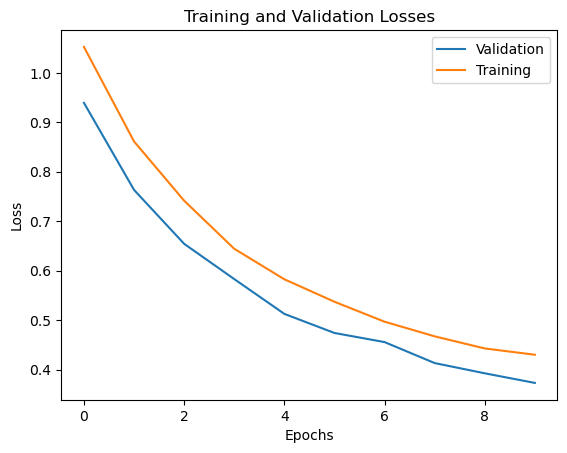

In [27]:
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision.models import resnet34
from tqdm import tqdm

# Set the device
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# Load the pretrained ResNet-34 model and replace the output layer
num_classes = 3
model = resnet34(pretrained=True)
model.fc = nn.Linear(model.fc.in_features, num_classes)

# Freeze all layers except the output layer
for param in model.parameters():
    param.requires_grad = False
for param in model.fc.parameters():
    param.requires_grad = True

# Set the loss function and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.fc.parameters(), lr=1e-4)

# Set the batch size and number of epochs
batch_size = 32
num_epochs = 10

# Move the model and loss function to the device
model = model.to(device)
criterion = criterion.to(device)

# Train the model
train_losses = []
val_losses = []
train_accs = []
val_accs = []
best_val_acc = 0.0
for epoch in range(num_epochs):
    # Training loop
    running_train_loss = 0.0
    running_train_corrects = 0
    model.train()
    for inputs, labels in tqdm(train_loader, desc=f'Train Epoch {epoch}'):
        inputs = inputs.to(device)
        labels = labels.to(device)
        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        running_train_loss += loss.item() * inputs.size(0)
        running_train_corrects += torch.sum(torch.argmax(outputs, axis=1) == labels)
    epoch_train_loss = running_train_loss / len(train_loader.dataset)
    epoch_train_acc = running_train_corrects / len(train_loader.dataset)
    train_losses.append(epoch_train_loss)
    train_accs.append(epoch_train_acc)

    # Validation loop
    running_val_loss = 0.0
    running_val_corrects = 0
    model.eval()
    with torch.no_grad():
        for inputs, labels in tqdm(val_loader, desc=f'Val Epoch {epoch}'):
            inputs = inputs.to(device)
            labels = labels.to(device)
            outputs = model(inputs)
            loss = criterion(outputs, labels)
            running_val_loss += loss.item() * inputs.size(0)
            running_val_corrects += torch.sum(torch.argmax(outputs, axis=1) == labels)
        epoch_val_loss = running_val_loss / len(val_loader.dataset)
        epoch_val_acc = running_val_corrects / len(val_loader.dataset)
        val_losses.append(epoch_val_loss)
        val_accs.append(epoch_val_acc)

    # Save the model with the best validation accuracy
    if epoch_val_acc > best_val_acc:
        best_val_acc = epoch_val_acc
        torch.save(model.state_dict(), 'best_model.pth')

    # Print the training and validation losses and accuracies for this epoch
    print(f'Epoch {epoch} Train Loss: {epoch_train_loss:.4f} Train Acc: {epoch_train_acc:.4f} '
          f'Val Loss: {epoch_val_loss:.4f} Val Acc: {epoch_val_acc:.4f}')

# Plot the learning and accuracy curves
import matplotlib.pyplot as plt

plt.plot(range(num_epochs), val_losses, label='Validation')
plt.plot(range(num_epochs), train_losses, label='Training')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Validation Losses')
plt.legend()
plt.show()

In [ ]:
#Training

In [7]:
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision.models import resnet34
from tqdm import tqdm
import matplotlib.pyplot as plt
import torch
import torchvision
from torchvision import transforms, datasets


# Set the device
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# Load the pretrained ResNet-34 model and replace the output layer
num_classes = 3
model = resnet34(pretrained=True)
model.fc = nn.Linear(model.fc.in_features, num_classes)

# Freeze all layers except the output layer
for param in model.parameters():
    param.requires_grad = False
for param in model.fc.parameters():
    param.requires_grad = True

# Set the loss function
criterion = nn.CrossEntropyLoss()

# Set the batch size and number of epochs
batch_size = 32
num_epochs = 10

# Define the learning rates and layers to unfreeze
learning_rates = [1e-3, 1e-4, 1e-5]
layer_unfreeze = [0, -1, -2, -3]

# Move the model and loss function to the device
model = model.to(device)
criterion = criterion.to(device)

# Create lists to store the losses and accuracies
train_losses = {i: [] for i in layer_unfreeze}
val_losses = {i: [] for i in layer_unfreeze}
train_accs = {i: [] for i in layer_unfreeze}
val_accs = {i: [] for i in layer_unfreeze}
best_val_acc = {i: 0.0 for i in layer_unfreeze}


# Create dictionary to store the best validation accuracy for each layer configuration
best_val_acc = {i: 0.0 for i in layer_unfreeze}

# Train the model for each learning rate and layer unfreezing combination
for i in layer_unfreeze:
    # Unfreeze the layers
    for param in model.parameters():
        param.requires_grad = False
    for param in list(model.parameters())[i:]:
        param.requires_grad = True

    # Set the optimizer for this set of layers
    optimizer = optim.Adam(filter(lambda p: p.requires_grad, model.parameters()), lr=learning_rates[i])

    # Train the model for the specified number of epochs
    for epoch in range(num_epochs):
        # Training loop
        running_train_loss = 0.0
        running_train_corrects = 0
        model.train()
        for inputs, labels in tqdm(train_loader, desc=f'Train Epoch {i}.{epoch}'):
            inputs = inputs.to(device)
            labels = labels.to(device)
            optimizer.zero_grad()
            outputs = model(inputs)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()
            running_train_loss += loss.item() * inputs.size(0)
            running_train_corrects += torch.sum(torch.argmax(outputs, axis=1) == labels)
        epoch_train_loss = running_train_loss / len(train_loader.dataset)
        epoch_train_acc = running_train_corrects / len(train_loader.dataset)
        train_losses[i].append(epoch_train_loss)
        train_accs[i].append(epoch_train_acc)

        # Validation loop
        running_val_loss = 0.0
        running_val_corrects = 0
        model.eval()
        with torch.no_grad():
            for inputs, labels in tqdm(val_loader, desc=f'Val Epoch {i}.{epoch}'):
                inputs = inputs.to(device)
                labels = labels.to(device)
                outputs = model(inputs)
                loss = criterion(outputs, labels)
                running_val_loss += loss.item() * inputs.size(0)
                running_val_corrects += torch.sum(torch.argmax(outputs, axis=1) == labels)
    
            epoch_val_loss = running_val_loss / len(val_data)
            epoch_val_acc = running_val_corrects / len(val_data)
            val_losses[i].append(epoch_val_loss)
            val_accs[i].append(epoch_val_acc)
            print(f'Val Loss: {epoch_val_loss:.4f} Val Acc: {epoch_val_acc:.4f}')
    
            # Update best validation accuracy
            if epoch_val_acc > best_val_acc[i]:
                best_val_acc[i] = epoch_val_acc
                torch.save(model.state_dict(), f'best_model_{i}.pth')

C:\Users\Kranti\anaconda3\lib\site-packages\torchvision\models\_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
C:\Users\Kranti\anaconda3\lib\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet34_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet34_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Val Epoch 0.0: 100%|███████████████████████████████████████████████████████████████████| 19/19 [00:25<00:00,  1.34s/it]


Val Loss: 1.3255 Val Acc: 0.6950


Val Epoch 0.1: 100%|███████████████████████████████████████████████████████████████████| 19/19 [00:24<00:00,  1.30s/it]


Val Loss: 2.2531 Val Acc: 0.6467


Val Epoch 0.2: 100%|███████████████████████████████████████████████████████████████████| 19/19 [00:24<00:00,  1.28s/it]


Val Loss: 0.0993 Val Acc: 0.9600


Val Epoch 0.3: 100%|███████████████████████████████████████████████████████████████████| 19/19 [00:24<00:00,  1.29s/it]


Val Loss: 1.1054 Val Acc: 0.7567


Val Epoch 0.4: 100%|███████████████████████████████████████████████████████████████████| 19/19 [00:24<00:00,  1.27s/it]


Val Loss: 0.0745 Val Acc: 0.9783


Val Epoch 0.5: 100%|███████████████████████████████████████████████████████████████████| 19/19 [00:24<00:00,  1.27s/it]


Val Loss: 12.9061 Val Acc: 0.3350


Val Epoch 0.6: 100%|███████████████████████████████████████████████████████████████████| 19/19 [00:24<00:00,  1.28s/it]


Val Loss: 0.0582 Val Acc: 0.9833


Val Epoch 0.7: 100%|███████████████████████████████████████████████████████████████████| 19/19 [00:23<00:00,  1.26s/it]


Val Loss: 0.0157 Val Acc: 0.9967


Val Epoch 0.8: 100%|███████████████████████████████████████████████████████████████████| 19/19 [00:23<00:00,  1.25s/it]


Val Loss: 0.4230 Val Acc: 0.8267


Val Epoch 0.9: 100%|███████████████████████████████████████████████████████████████████| 19/19 [00:24<00:00,  1.28s/it]


Val Loss: 6.0519 Val Acc: 0.3350


Val Epoch -1.0: 100%|██████████████████████████████████████████████████████████████████| 19/19 [00:24<00:00,  1.27s/it]


Val Loss: 0.0156 Val Acc: 0.9917


Val Epoch -1.1: 100%|██████████████████████████████████████████████████████████████████| 19/19 [00:24<00:00,  1.28s/it]


Val Loss: 0.0179 Val Acc: 0.9950


Val Epoch -1.2: 100%|██████████████████████████████████████████████████████████████████| 19/19 [00:25<00:00,  1.36s/it]


Val Loss: 0.0125 Val Acc: 0.9967


Val Epoch -1.3: 100%|██████████████████████████████████████████████████████████████████| 19/19 [00:24<00:00,  1.27s/it]


Val Loss: 0.0158 Val Acc: 0.9933


Val Epoch -1.4: 100%|██████████████████████████████████████████████████████████████████| 19/19 [00:24<00:00,  1.29s/it]


Val Loss: 0.0095 Val Acc: 0.9967


Val Epoch -1.5: 100%|██████████████████████████████████████████████████████████████████| 19/19 [00:23<00:00,  1.26s/it]


Val Loss: 0.0204 Val Acc: 0.9950


Val Epoch -1.6: 100%|██████████████████████████████████████████████████████████████████| 19/19 [00:24<00:00,  1.28s/it]


Val Loss: 0.0117 Val Acc: 0.9950


Val Epoch -1.7: 100%|██████████████████████████████████████████████████████████████████| 19/19 [00:24<00:00,  1.30s/it]


Val Loss: 0.0146 Val Acc: 0.9933


Val Epoch -1.8: 100%|██████████████████████████████████████████████████████████████████| 19/19 [00:24<00:00,  1.28s/it]


Val Loss: 0.0093 Val Acc: 0.9967


Val Epoch -1.9: 100%|██████████████████████████████████████████████████████████████████| 19/19 [00:24<00:00,  1.31s/it]


Val Loss: 0.0263 Val Acc: 0.9933


Val Epoch -2.0: 100%|██████████████████████████████████████████████████████████████████| 19/19 [00:24<00:00,  1.29s/it]


Val Loss: 0.0117 Val Acc: 0.9967


Val Epoch -2.1: 100%|██████████████████████████████████████████████████████████████████| 19/19 [00:27<00:00,  1.47s/it]


Val Loss: 0.0256 Val Acc: 0.9950


Val Epoch -2.2: 100%|██████████████████████████████████████████████████████████████████| 19/19 [00:24<00:00,  1.29s/it]


Val Loss: 0.0136 Val Acc: 0.9917


Val Epoch -2.3: 100%|██████████████████████████████████████████████████████████████████| 19/19 [00:24<00:00,  1.27s/it]


Val Loss: 0.0220 Val Acc: 0.9933


Val Epoch -2.4: 100%|██████████████████████████████████████████████████████████████████| 19/19 [00:27<00:00,  1.44s/it]


Val Loss: 0.0157 Val Acc: 0.9967


Val Epoch -2.5: 100%|██████████████████████████████████████████████████████████████████| 19/19 [00:27<00:00,  1.46s/it]


Val Loss: 0.0194 Val Acc: 0.9917


Val Epoch -2.6: 100%|██████████████████████████████████████████████████████████████████| 19/19 [00:27<00:00,  1.45s/it]


Val Loss: 0.0161 Val Acc: 0.9967


Val Epoch -2.7: 100%|██████████████████████████████████████████████████████████████████| 19/19 [00:27<00:00,  1.46s/it]


Val Loss: 0.0193 Val Acc: 0.9933


Val Epoch -2.8: 100%|██████████████████████████████████████████████████████████████████| 19/19 [00:28<00:00,  1.50s/it]


Val Loss: 0.0235 Val Acc: 0.9933


Val Epoch -2.9: 100%|██████████████████████████████████████████████████████████████████| 19/19 [00:27<00:00,  1.43s/it]


Val Loss: 0.0170 Val Acc: 0.9917


Val Epoch -3.0: 100%|██████████████████████████████████████████████████████████████████| 19/19 [00:27<00:00,  1.44s/it]


Val Loss: 0.0151 Val Acc: 0.9917


Val Epoch -3.1: 100%|██████████████████████████████████████████████████████████████████| 19/19 [00:30<00:00,  1.63s/it]


Val Loss: 0.0144 Val Acc: 0.9933


Val Epoch -3.2: 100%|██████████████████████████████████████████████████████████████████| 19/19 [00:28<00:00,  1.49s/it]


Val Loss: 0.0224 Val Acc: 0.9933


Val Epoch -3.3: 100%|██████████████████████████████████████████████████████████████████| 19/19 [00:27<00:00,  1.44s/it]


Val Loss: 0.0129 Val Acc: 0.9950


Val Epoch -3.4: 100%|██████████████████████████████████████████████████████████████████| 19/19 [00:27<00:00,  1.44s/it]


Val Loss: 0.0050 Val Acc: 0.9983


Val Epoch -3.5: 100%|██████████████████████████████████████████████████████████████████| 19/19 [00:27<00:00,  1.43s/it]


Val Loss: 0.0073 Val Acc: 0.9983


Val Epoch -3.6: 100%|██████████████████████████████████████████████████████████████████| 19/19 [00:27<00:00,  1.44s/it]


Val Loss: 0.0127 Val Acc: 0.9967


Val Epoch -3.7: 100%|██████████████████████████████████████████████████████████████████| 19/19 [00:27<00:00,  1.44s/it]


Val Loss: 0.0076 Val Acc: 0.9967


Val Epoch -3.8: 100%|██████████████████████████████████████████████████████████████████| 19/19 [00:28<00:00,  1.48s/it]


Val Loss: 0.0190 Val Acc: 0.9967


Val Epoch -3.9: 100%|██████████████████████████████████████████████████████████████████| 19/19 [00:27<00:00,  1.47s/it]

Val Loss: 0.0171 Val Acc: 0.9967


In [8]:
summary(model, input_size=(3,224,224))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1         [-1, 64, 112, 112]           9,408
       BatchNorm2d-2         [-1, 64, 112, 112]             128
              ReLU-3         [-1, 64, 112, 112]               0
         MaxPool2d-4           [-1, 64, 56, 56]               0
            Conv2d-5           [-1, 64, 56, 56]          36,864
       BatchNorm2d-6           [-1, 64, 56, 56]             128
              ReLU-7           [-1, 64, 56, 56]               0
            Conv2d-8           [-1, 64, 56, 56]          36,864
       BatchNorm2d-9           [-1, 64, 56, 56]             128
             ReLU-10           [-1, 64, 56, 56]               0
       BasicBlock-11           [-1, 64, 56, 56]               0
           Conv2d-12           [-1, 64, 56, 56]          36,864
      BatchNorm2d-13           [-1, 64, 56, 56]             128
             ReLU-14           [-1, 64,

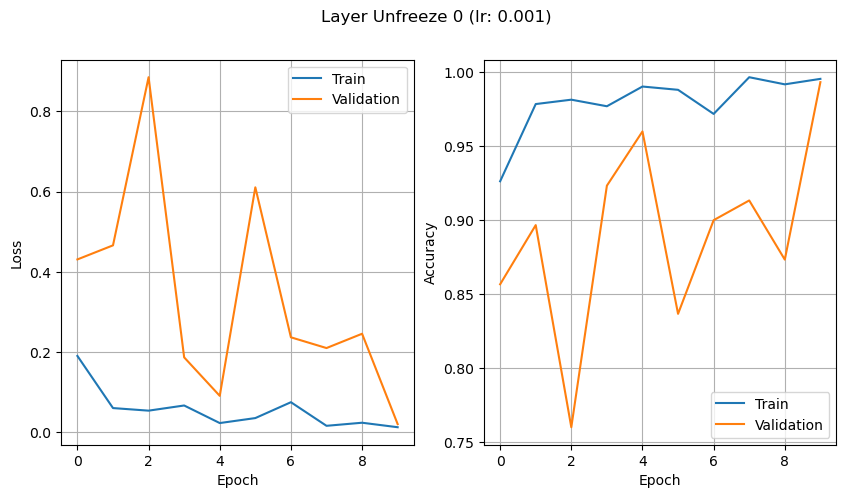

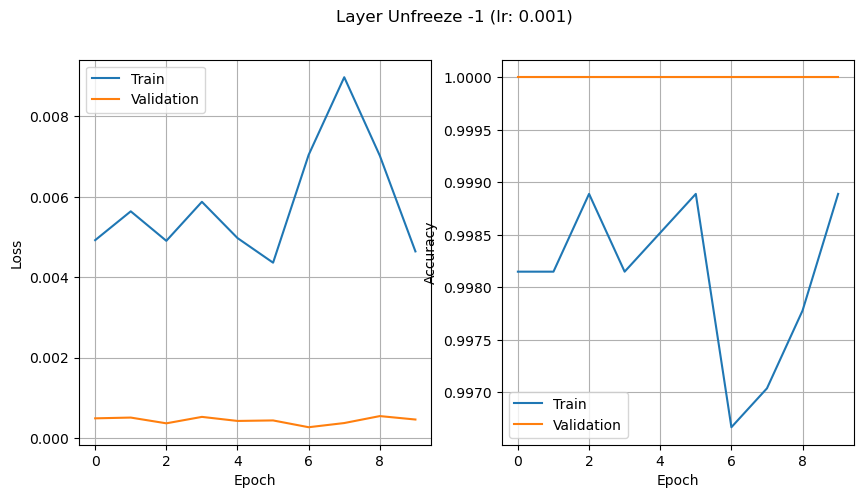

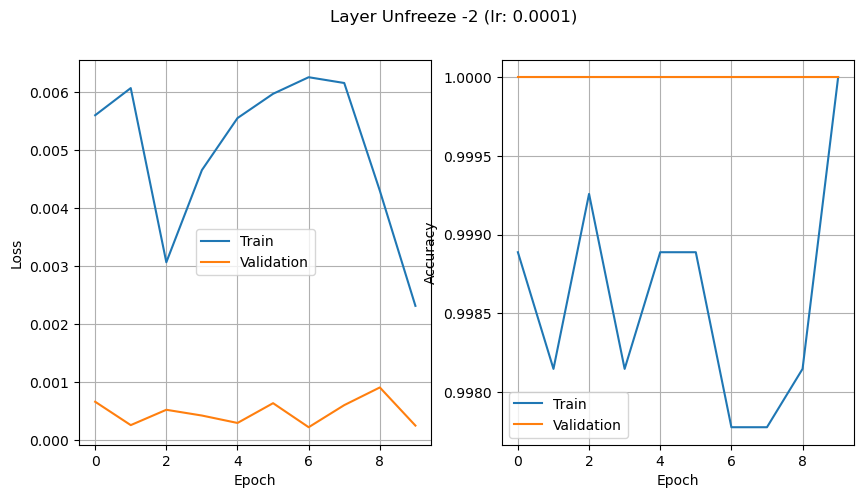

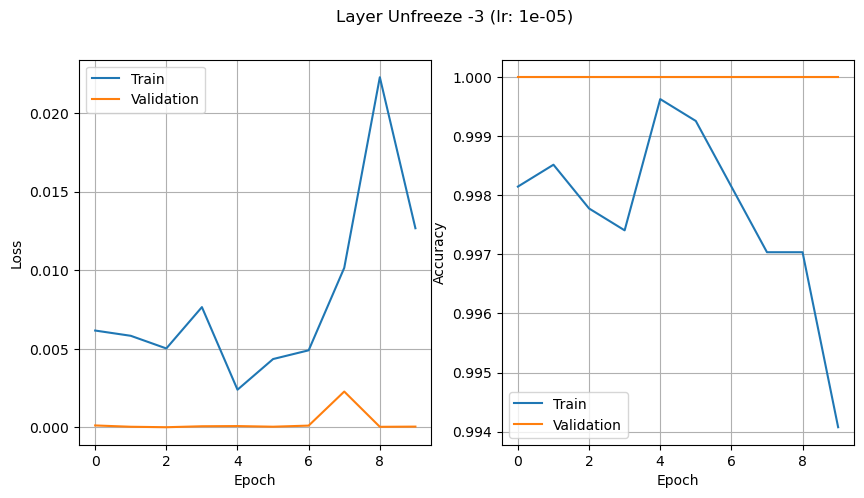

In [47]:
# Plot the learning and accuracy curves for each layer configuration
for i in layer_unfreeze:
    if i < 0:
        lr_name = f'lr: {learning_rates[-i-1]}'
    else:
        lr_name = f'lr: {learning_rates[i]}'

    fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(10, 5))
    fig.suptitle(f'Layer Unfreeze {i} ({lr_name})')

    # Plot the learning curves
    ax[0].plot(train_losses[i], label='Train')
    ax[0].plot(val_losses[i], label='Validation')
    ax[0].set_xlabel('Epoch')
    ax[0].set_ylabel('Loss')
    ax[0].legend()
    ax[0].grid(True)

    # Plot the accuracy curves
    ax[1].plot(train_accs[i], label='Train')
    ax[1].plot(val_accs[i], label='Validation')
    ax[1].set_xlabel('Epoch')
    ax[1].set_ylabel('Accuracy')
    ax[1].legend()
    ax[1].grid(True)

    plt.show()

In [ ]:
#Layer visualization

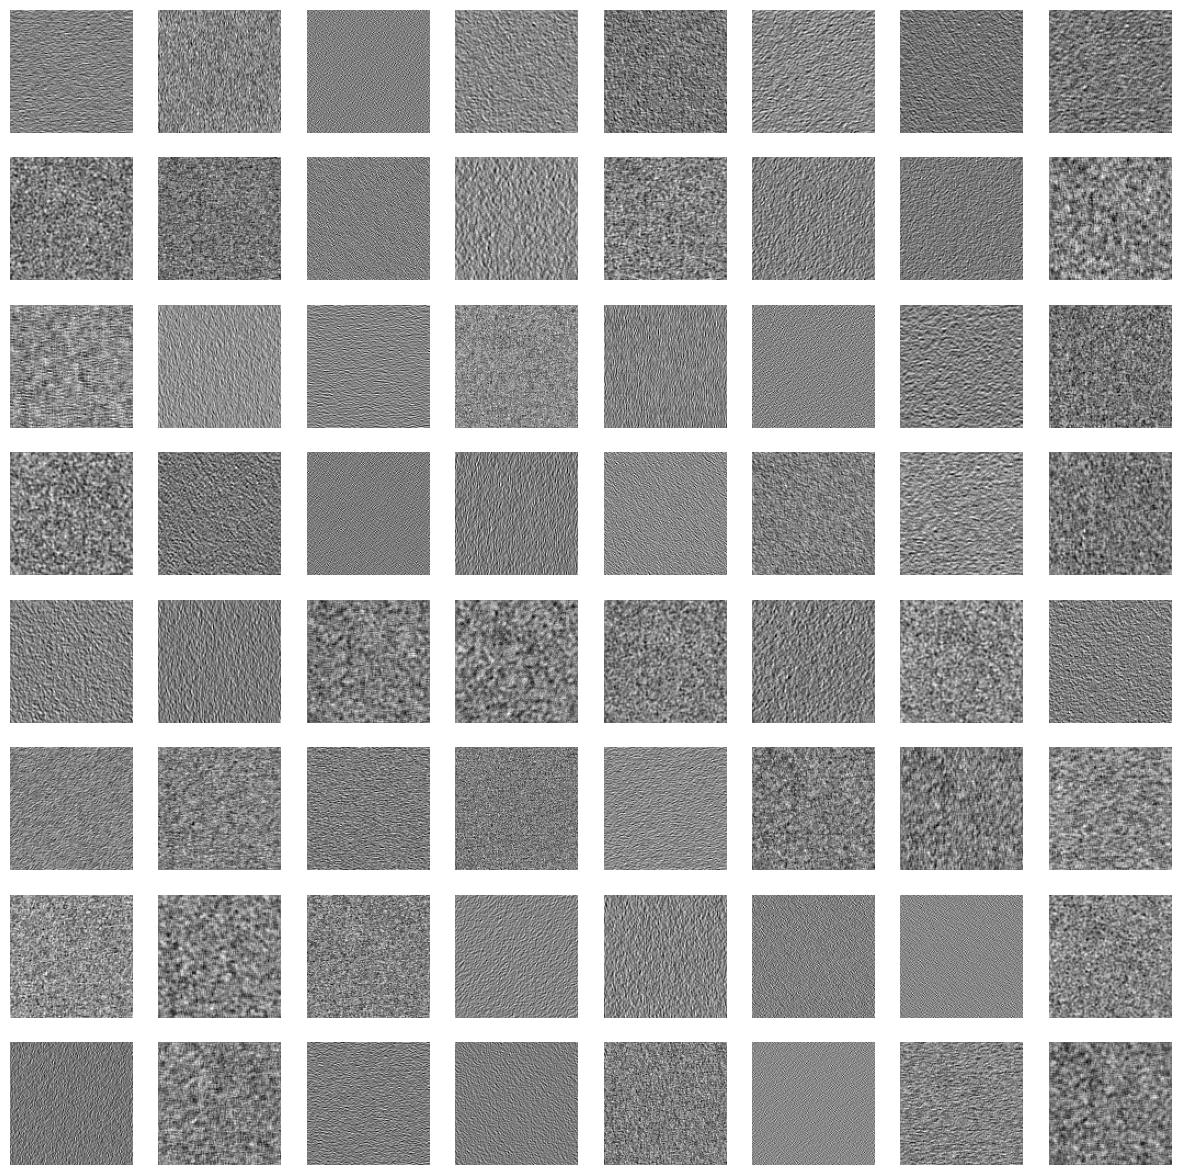

In [21]:
import torch
import torch.nn as nn
import matplotlib.pyplot as plt

def visualize_hook(module, input, output):
    num_channels = output.size(1)
    num_rows = (num_channels - 1) // 8 + 1

    plt.figure(figsize=(15, 15))
    for i in range(num_channels):
        plt.subplot(num_rows, 8, i + 1)
        plt.imshow(output[0, i].detach().cpu().numpy(), cmap="gray")
        plt.axis("off")
    plt.show()

# Choose a specific layer and register the hook
layer_to_visualize = model.conv1
hook = layer_to_visualize.register_forward_hook(visualize_hook)

# Run a single image through the model
image = torch.randn(1, 3, 224, 224)  # Replace this with a real image from the dataset
_ = model(image)

hook.remove()  # Remove the hook


In [ ]:
#Analysis

In [22]:
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision.models import resnet34
from sklearn.metrics import confusion_matrix
import numpy as np

# Set the device
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# Load the pretrained ResNet-34 model and replace the output layer
num_classes = 3
model = resnet34(pretrained=True)
model.fc = nn.Linear(model.fc.in_features, num_classes)

# Freeze all layers except the output layer
for param in model.parameters():
    param.requires_grad = False
for param in model.fc.parameters():
    param.requires_grad = True

# Set the loss function and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.fc.parameters(), lr=1e-4)

# Set the batch size and number of epochs
batch_size = 32
num_epochs = 10

# Move the model and loss function to the device
model = model.to(device)
criterion = criterion.to(device)

# Train the model
for epoch in range(num_epochs):
    # Training loop
        running_train_loss = 0.0
        running_train_corrects = 0
        model.train()
        for inputs, labels in tqdm(train_loader, desc=f'Train Epoch {i}.{epoch}'):
            inputs = inputs.to(device)
            labels = labels.to(device)
            optimizer.zero_grad()
            outputs = model(inputs)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()
            running_train_loss += loss.item() * inputs.size(0)
            running_train_corrects += torch.sum(torch.argmax(outputs, axis=1) == labels)
        epoch_train_loss = running_train_loss / len(train_loader.dataset)
        epoch_train_acc = running_train_corrects / len(train_loader.dataset)
        train_losses[i].append(epoch_train_loss)
        train_accs[i].append(epoch_train_acc)

        # Validation loop
        running_val_loss = 0.0
        running_val_corrects = 0
        model.eval()
        with torch.no_grad():
            for inputs, labels in tqdm(val_loader, desc=f'Val Epoch {i}.{epoch}'):
                inputs = inputs.to(device)
                labels = labels.to(device)
                outputs = model(inputs)
                loss = criterion(outputs, labels)
                running_val_loss += loss.item() * inputs.size(0)
                running_val_corrects += torch.sum(torch.argmax(outputs, axis=1) == labels)
    
            epoch_val_loss = running_val_loss / len(val_data)
            epoch_val_acc = running_val_corrects / len(val_data)
            val_losses[i].append(epoch_val_loss)
            val_accs[i].append(epoch_val_acc)
            print(f'Val Loss: {epoch_val_loss:.4f} Val Acc: {epoch_val_acc:.4f}')

# Load the best model based on validation accuracy
best_model_path = 'best_model.pth'
model.load_state_dict(torch.load(best_model_path))
model.eval()

# Evaluate the model on the testing set
test_corrects = 0
test_predictions = []
test_labels = []
with torch.no_grad():
    for inputs, labels in test_loader:
        inputs = inputs.to(device)
        labels = labels.to(device)
        outputs = model(inputs)
        _, predicted = torch.max(outputs, 1)
        test_corrects += torch.sum(predicted == labels)
        test_predictions.extend(predicted.cpu().numpy())
        test_labels.extend(labels.cpu().numpy())

test_accuracy = test_corrects / len(test_data)
print(f'Testing Accuracy: {test_accuracy:.4f}')

# Generate confusion matrix
confusion_mat = confusion_matrix(test_labels, test_predictions)
print('Confusion Matrix:')
print(confusion_mat)

C:\Users\Kranti\anaconda3\lib\site-packages\torchvision\models\_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
C:\Users\Kranti\anaconda3\lib\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet34_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet34_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Val Epoch 0.0: 100%|███████████████████████████████████████████████████████████████████| 19/19 [00:28<00:00,  1.52s/it]


Val Loss: 0.9384 Val Acc: 0.6033


Val Epoch 0.1: 100%|███████████████████████████████████████████████████████████████████| 19/19 [00:25<00:00,  1.37s/it]


Val Loss: 0.8335 Val Acc: 0.6683


Val Epoch 0.2: 100%|███████████████████████████████████████████████████████████████████| 19/19 [00:25<00:00,  1.34s/it]


Val Loss: 0.7309 Val Acc: 0.7517


Val Epoch 0.3: 100%|███████████████████████████████████████████████████████████████████| 19/19 [00:24<00:00,  1.29s/it]


Val Loss: 0.6705 Val Acc: 0.7800


Val Epoch 0.4: 100%|███████████████████████████████████████████████████████████████████| 19/19 [00:24<00:00,  1.29s/it]


Val Loss: 0.6358 Val Acc: 0.7817


Val Epoch 0.5: 100%|███████████████████████████████████████████████████████████████████| 19/19 [00:24<00:00,  1.29s/it]


Val Loss: 0.5857 Val Acc: 0.8183


Val Epoch 0.6: 100%|███████████████████████████████████████████████████████████████████| 19/19 [00:24<00:00,  1.30s/it]


Val Loss: 0.5597 Val Acc: 0.8317


Val Epoch 0.7: 100%|███████████████████████████████████████████████████████████████████| 19/19 [00:26<00:00,  1.37s/it]


Val Loss: 0.5255 Val Acc: 0.8517


Val Epoch 0.8: 100%|███████████████████████████████████████████████████████████████████| 19/19 [00:27<00:00,  1.45s/it]


Val Loss: 0.4935 Val Acc: 0.8467


Val Epoch 0.9: 100%|███████████████████████████████████████████████████████████████████| 19/19 [00:24<00:00,  1.30s/it]


Val Loss: 0.4712 Val Acc: 0.8650
Testing Accuracy: 0.9017
Confusion Matrix:
[[191   2   6]
 [  1 176  22]
 [ 18  10 174]]
